In [4]:
import duckdb
import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
drive.mount('/content/drive')

drive_path = "drive/MyDrive/Assignatures/PODS/DATA/Incidents.csv"
df = pd.read_csv(drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

#THRESHOLD FOR MULTITASKING IS PERFORMING 2 ACTIVITIES IN LESS THAN 5 MINUTES

df['End_Time'] = pd.to_datetime(df['End_Time'])
# Calculate the time difference between consecutive activities
df['Time_Diff'] = df.groupby('Resource')['End_Time'].shift(-1) - df['End_Time']
# Detect multitasking (gap less than a threshold, e.g., 15 minutes)
df['Multitasking'] = df['Time_Diff'].apply(lambda x: x < pd.Timedelta(minutes=5) if pd.notnull(x) else False)
multitasking_count = df.groupby('Resource')['Multitasking'].sum()



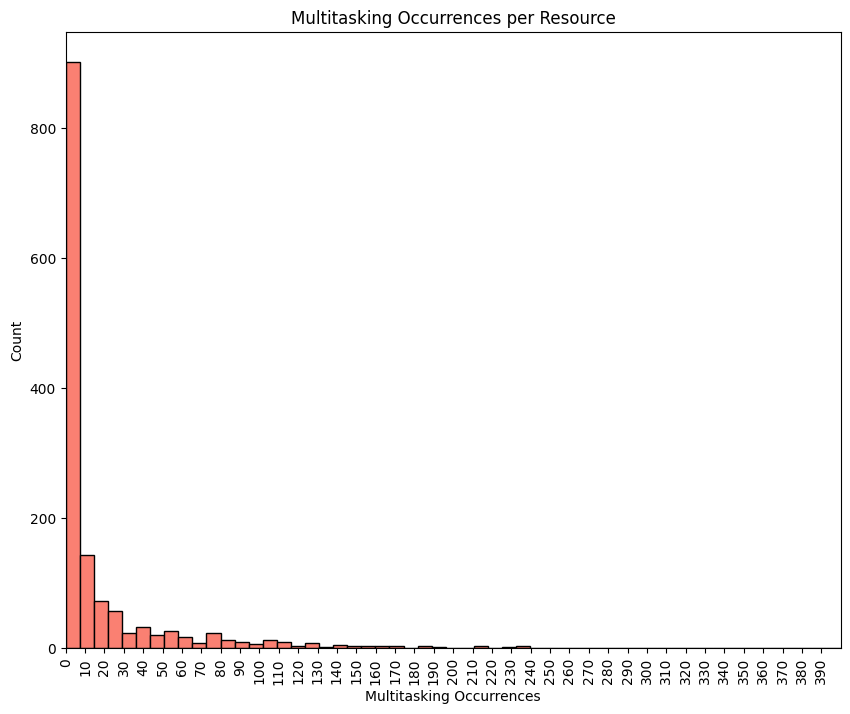

In [9]:
# Multitasking Occurrences Distribution
plt.figure(figsize=(10, 8))  # Adjust width and height for large size
plt.hist(multitasking_count, bins=500, color='salmon', edgecolor='black')
plt.title("Multitasking Occurrences per Resource")
plt.xlabel("Multitasking Occurrences")
plt.ylabel("Count")
plt.xlim(0, 400)
plt.xticks(range(0,400, 10),rotation=90)
plt.show()

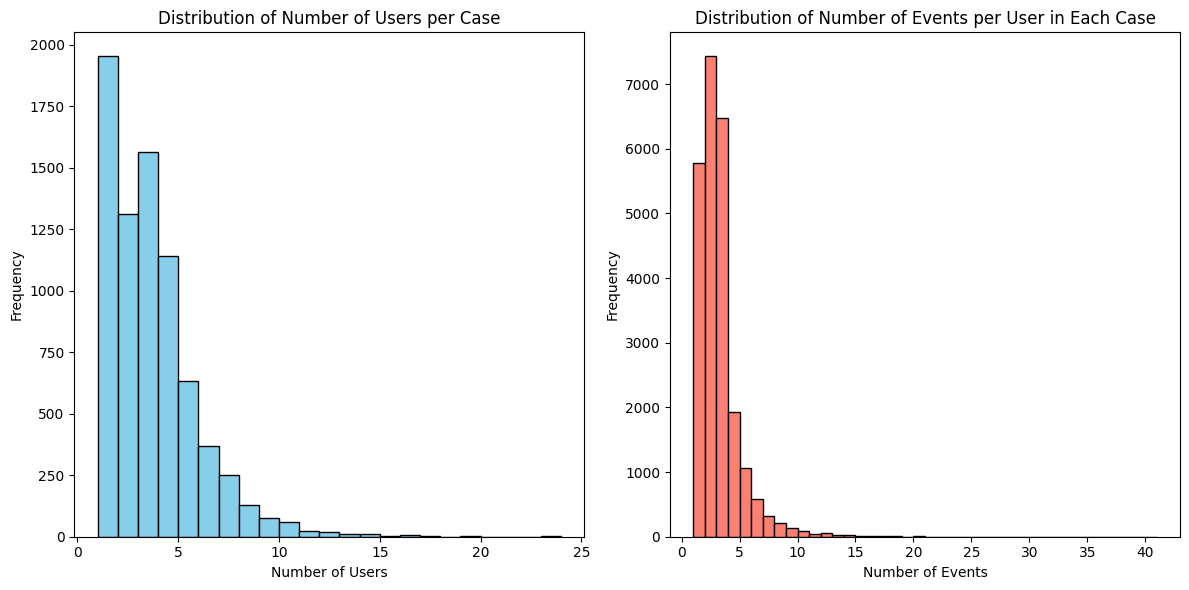

In [10]:
users_per_case = df.groupby('Case_ID')['Resource'].nunique().reset_index(name='Num_Users')
events_per_user = df.groupby(['Case_ID', 'Resource']).size().reset_index(name='Num_Events')
merged_df = pd.merge(events_per_user, users_per_case, on='Case_ID')

plt.figure(figsize=(12, 6))
# Plot the number of users per case
plt.subplot(1, 2, 1)
plt.hist(users_per_case['Num_Users'], bins=range(1, users_per_case['Num_Users'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Users per Case')
plt.xlabel('Number of Users')
plt.ylabel('Frequency')

# Plot the number of events per user in each case
plt.subplot(1, 2, 2)
plt.hist(merged_df['Num_Events'], bins=range(1, merged_df['Num_Events'].max() + 1), color='salmon', edgecolor='black')
plt.title('Distribution of Number of Events per User in Each Case')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()